In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os

plt.style.use("dark_background")

In [11]:
def quat_to_R(Q):
    """
    Covert a quaternion into a full three-dimensional rotation matrix.
 
    Input
    :param Q: A 4 element array representing the quaternion (q0,q1,q2,q3) 
 
    Output
    :return: A 3x3 element matrix representing the full 3D rotation matrix. 
             This rotation matrix converts a point in the local reference 
             frame to a point in the global reference frame.
    """
    # Extract the values from Q
    q0 = Q[0]
    q1 = Q[1]
    q2 = Q[2]
    q3 = Q[3]
     
    # First row of the rotation matrix
    r00 = 2 * (q0 * q0 + q1 * q1) - 1
    r01 = 2 * (q1 * q2 - q0 * q3)
    r02 = 2 * (q1 * q3 + q0 * q2)
     
    # Second row of the rotation matrix
    r10 = 2 * (q1 * q2 + q0 * q3)
    r11 = 2 * (q0 * q0 + q2 * q2) - 1
    r12 = 2 * (q2 * q3 - q0 * q1)
     
    # Third row of the rotation matrix
    r20 = 2 * (q1 * q3 - q0 * q2)
    r21 = 2 * (q2 * q3 + q0 * q1)
    r22 = 2 * (q0 * q0 + q3 * q3) - 1
     
    # 3x3 rotation matrix
    rot_matrix = np.array([[r00, r01, r02],
                           [r10, r11, r12],
                           [r20, r21, r22]])
                            
    return rot_matrix

In [2]:
raw_dir = "../data/diamond/raw/diamond_run"
poses = np.genfromtxt(os.path.join(raw_dir, "poses.gt"), delimiter=" ", skip_header=True)
# poses: t, x, y, z, quat.w, quat.x, quat.y, quat.z

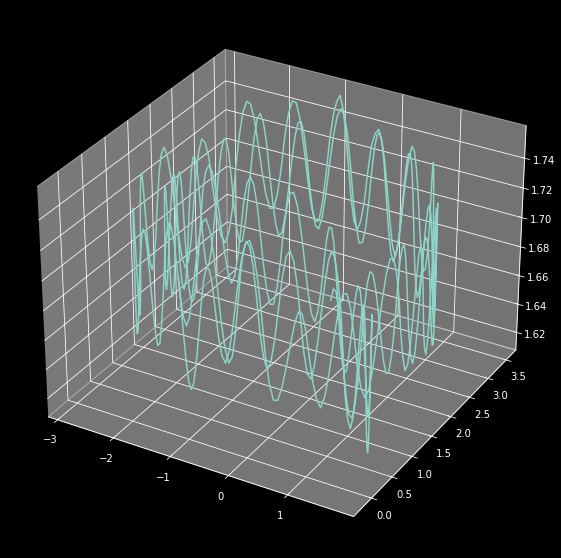

In [10]:
(fig, ax) = plt.subplots(subplot_kw=dict(projection="3d"), figsize=(10, 10))
ax.plot(xs=poses[:, 1], ys=poses[:, 2], zs=poses[:, 3])